<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/Laboratorio1IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow    
from skimage import io
from PIL import Image
import matplotlib.pylab as plt



In [51]:
def convolutional_filter(imagen, kernel):
  alto = imagen.shape[0]
  ancho =  imagen.shape[1]
  altoKernel = len(kernel[:,0])
  anchoKernel = len(kernel[0,:])
  step = int(len(kernel[0,:])/2)
  newImg = np.zeros((alto, ancho, 1))
  for i in range(step, alto - step):
    newPixel = 0
    for j in range(step, ancho - step):
      ventana = imagen[i-step:i+2*step, j-step:j+2*step]
      newPixel = 0
      for m in range(0, altoKernel):
        for n in range(0, anchoKernel):
          newPixel = newPixel + ventana[m, n] * kernel[m, n]
          newImg[i, j] = int(newPixel)
  return newImg 

In [45]:
def derivadaX(img):
 derivadax = np.zeros((alto,ancho,1))
 for i in range(0,alto):
    for j in range (0,ancho-1):
      pixel = img[i,j] 
      derivadax[i,j] = img[i,j+1] - pixel
 return derivadax


In [46]:
def derivadaY(img):
   derivaday = np.zeros((alto,ancho,1))
   for i in range(0,alto-1):
     for j in range (0,ancho):
        pixel = img[i,j] 
        derivaday[i,j] = img[i+1,j] - pixel
   return derivaday

In [59]:
def magnitud(dx,dy,alto,ancho):
   magnitud = np.zeros((alto,ancho,1))
   for i in range(0,alto):
     for j in range (0,ancho):
        pixelx = dx[i,j]
        pixely = dy[i,j]
        magnitud[i,j] = math.sqrt(pixelx**2 + pixely**2)
   return magnitud

In [63]:
def fase(dx,dy,alto,ancho):
   fase = np.zeros((alto,ancho,1))
   for i in range(0,alto):
     for j in range (0,ancho):
       angulo = int ((180/math.pi)*math.atan2(dy[i,j],dx[i,j]))
       fase[i,j] = angulo 
   return fase

In [15]:


def generaGrises(alto,ancho,img):
  gray_green = np.zeros((alto,ancho,1))
  gray_blue = np.zeros((alto,ancho,1))
  gray_red = np.zeros((alto,ancho,1))
  gray_aritmetica = np.zeros((alto,ancho,1))
  gray_ponderada = np.zeros((alto,ancho,1))
  for i in range(0,alto):
   for j in range (0,ancho):
    pixel = img[i,j]
    gray_blue[i,j] = pixel[2]
    gray_green[i,j] = pixel[1]
    gray_red[i,j] = pixel [0]
    gray_aritmetica[i,j] = np.mean(pixel)
    gray_ponderada[i,j] = int(0.299*pixel[2] + 0.587*pixel[1] + 0.114*pixel[0])
  return gray_red,gray_blue,gray_green,gray_aritmetica,gray_ponderada

img = cv2.imread('98.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

alto = img.shape[0]
ancho = img.shape[1]
print (img.shape)
gray_red,gray_blue,gray_green,gray_aritmetica,gray_ponderada = generaGrises(alto,ancho,img)







(1110, 1316, 3)


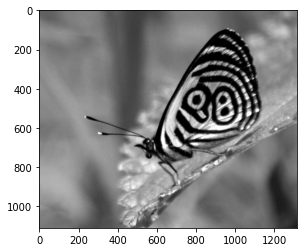

In [52]:
def write_and_show (strImg,arrImg):
  cv2.imwrite(strImg,arrImg)
  imgTemp = cv2.imread(strImg)
  imgTemp = cv2.cvtColor(imgTemp,cv2.COLOR_BGR2RGB)
  plt.imshow(imgTemp)

write_and_show("98grisponderada.jpg",gray_red)

In [53]:
#filtrogausiano = cv2.GaussianBlur(gray_ponderada,(5,5),0)

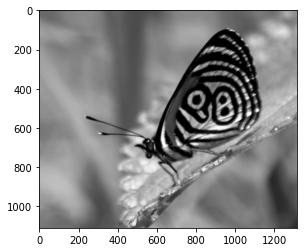

In [54]:
write_and_show('98gaussiano.jpg',filtrogausiano)

In [55]:
x = derivadaX(filtrogausiano)

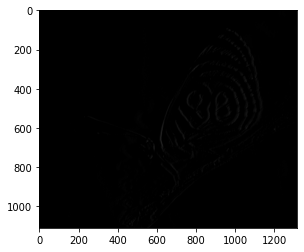

In [56]:
write_and_show('98derivadax.jpg',x)

In [57]:
y = derivadaY(filtrogausiano)

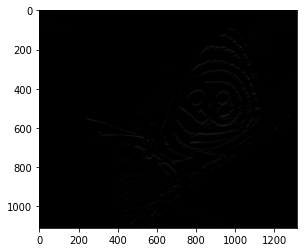

In [58]:
write_and_show('98derivaday.jpg',y)

In [60]:
mag   = magnitud(x,y,alto,ancho)

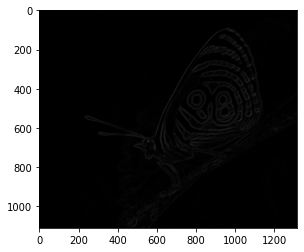

In [61]:
write_and_show('98magnitud.jpg',mag)

In [64]:
f1   = fase(x,y,alto,ancho)

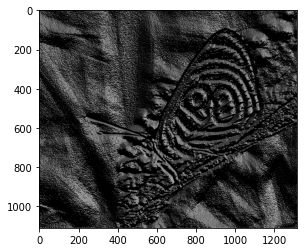

In [65]:
write_and_show('98fase.jpg',f1)